In [49]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import missingno as msno
from scipy.stats import chi2_contingency


<h3>This notebook study on the relationship between transgender identity and HIV prevalence and risk perception.</h3> 

I aim to investigate whether transgender individuals are more susceptible to contracting HIV or are more concerned about HIV transmission compared to the general population. 

In [10]:
combined = pd.read_csv('data/combined.csv')
combined

<ipython-input-10-849f682b828c>:1: DtypeWarning: Columns (8,18,19,20,22,23,25,39,74,75,77,215,297,298,306,307,308,309,311,312,313) have mixed types. Specify dtype option on import or set low_memory=False.
  combined = pd.read_csv('data/combined.csv')


,Unnamed: 0,STUDYID,WEIGHT_CISGENDER_TRANSPOP,WEIGHT_CISGENDER,WEIGHT_TRANSPOP,GMETHOD_TYPE,SURVEYCOMPLETED,GRESPONDENT_DATE,GCENREG,RACE,...,ACE_SEP,ACE_INC,ACE_EMO_I,ACE_PHY_I,ACE_SEX_I,ACE_IPV_I,ACE_SUB_I,ACE_MEN_I,ACE_SEP_I,ACE_INC_I
0,0,151768927,0.022039,,.9861429333687,,0,26-APR-2016,1,6,...,0,0,1,0,0,0,0,0,0,0
1,1,152357242,0.008485,,.3796825110912,,0,07-APR-2016,3,6,...,0,0,0,0,0,0,0,1,0,0
2,2,152444055,0.015764,,.705381155014,,0,01-MAY-2016,3,6,...,0,0,0,0,0,0,0,1,0,0
3,3,152525272,0.035655,,1.5953975915909,,0,20-APR-2016,4,6,...,1,1,1,0,0,1,1,1,1,1
4,4,152894493,0.041802,,1.870422244072,,0,05-MAY-2016,2,8,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,197167223,6.299798,5.1374626159668,,SCAN,2,27-DEC-2018,4,3,...,0,0,1,1,0,1,1,1,0,0
1432,1432,197167224,0.581383,.4741154909134,,SCAN,2,15-JAN-2019,4,6,...,0,0,1,0,1,0,0,1,0,0
1433,1433,197168195,2.584832,2.1079211235046,,WEB,2,13-DEC-2018,1,6,...,0,0,1,1,1,1,0,1,0,0
1434,1434,197169207,0.545099,.4445266127586,,WEB,2,08-DEC-2018,4,6,...,0,0,0,0,0,0,0,0,0,0


***Null hypothesis***: The proportion of cisgender individuals getting HIV is equal to the proportion of transgender individuals getting HIV.<br>
***Alternative hypothesis***: The proportion of cisgender individuals getting HIV is smaller than the proportion of transgender individuals getting HIV. <br>
***Source*** 
Have you EVER been told by a doctor or health professional that you had any of the following? Please mark all that apply... HIV/AIDS
Taken from: TransPop, United States, 2016-2018.

In [28]:
# Count the number of transgender and cisgender individuals
gender_counts = combined['TRANS_CIS'].value_counts()
gender_counts

2    1162
1     274
Name: TRANS_CIS, dtype: int64

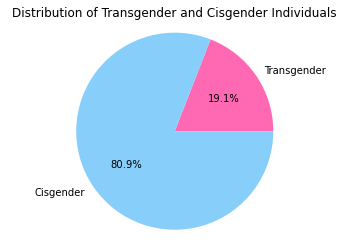

In [27]:
# Create a pie chart
labels = ['Transgender', 'Cisgender']
sizes = [gender_counts[1], gender_counts[2]]
colors = ['#FF69B4', '#87CEFA']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Transgender and Cisgender Individuals')
plt.show()

In [29]:
combined[combined['Q97_21'].notnull()][['TRANS_CIS','Q97_21']]

,TRANS_CIS,Q97_21
0,1,
1,1,
2,1,
3,1,
4,1,
...,...,...
1431,2,
1432,2,
1433,2,
1434,2,


<h3>***Q97_21 is about "Have you EVER been told by a doctor or health professional that you had any of the following? Please mark all that apply... HIV/AIDS"***



Value	Label
1	Hypertension

2	High cholesterol

3	Heart condition or heart disease

4	Angina

5	A heart attack

6	A stroke

7	Emphysema

8	Asthma

9	An ulcer

10	Cancer or a malignancy of any kind

11	Diabetes

12	
Prediabetes, impaired fasting glucose, impaired glucose tolerance, borderline diabetes, or high blood sugar	
13	
Arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia	
14	Blood clots in legs or lungs

15	Osteoporosis or loss of bone density

16	Thyroid problems

17	Liver disease

18	Chronic obstructive pulmonary disease (COPD)

19	Crohn's disease or ulcerative colitis

20	Kidney disease

21	HIV/AIDS

22	
Other sexually transmitted infection (not including HIV/AIDS)
23	Sleep disorder (e.g., insomnia or sleep apnea)



In [62]:
distribution_combined = combined['Q97_21'].value_counts()
distribution_combined.index

Index([' ', '21'], dtype='object')

We can observe that out of 1436 answers, there are 1422 missing answers and only 14 people report "21" that they have HIV/AIDS.

The high rate of ***missing data (approximately 99%)*** in this column may limit the generalizability of any conclusions that can be drawn from this dataset about HIV/AIDS prevalence among this population. It's important to consider whether the missing data is missing completely at random or if there are any patterns to the missingness that could bias the results.

In [78]:
hiv = combined['Q97_21'].replace(' ',-1)
cis_trans = combined['TRANS_CIS']
hiv_combined = pd.DataFrame({'hiv': hiv, 'cis_trans': cis_trans})
hiv_combined
#in hiv_combine dataframe, there are two columns; in column "cis_trans", 
#1 represents transgender and 2 represents cisgender
#in "hiv" column, -1 represents there are not reported diseases,
#and 21 represents HIV/AIDS

,hiv,cis_trans
0,-1,1
1,-1,1
2,-1,1
3,-1,1
4,-1,1
...,...,...
1431,-1,2
1432,-1,2
1433,-1,2
1434,-1,2


In [80]:
# Create a contingency table of the two variables
contingency_table = pd.crosstab(hiv_combined['cis_trans'], hiv_combined['hiv'])
contingency_table

hiv,-1,21
cis_trans,,
1,263,11
2,1159,3


In [84]:
# Perform the chi-squared test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
one_tailed_p_value = p_value/2

print("Chi-squared statistic:", chi2)
print("Degrees of freedom:", dof)
print("Expected values:", expected)
print("One-tailed p-value:", one_tailed_p_value)

Chi-squared statistic: 28.632368767935702
Degrees of freedom: 1
Expected values: [[ 271.32869081    2.67130919]
 [1150.67130919   11.32869081]]
One-tailed p-value: 4.375356120456292e-08


<h3> Conclusion</h3>

we can conclude that there is strong evidence to suggest that the proportion of cisgender individuals getting HIV **is smaller** than the proportion of transgender individuals getting HIV (one-tailed p-value: 4.38e-08).<br>
Therefore, transgender individuals **are more likely** to contract HIV than cisgender individuals based on the available data.<br>This finding has important implications for public health interventions to prevent HIV transmission among transgender individuals.

